In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [2]:
n_samples=1000
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None


In [3]:
colors="bgrcmyk"
data=[circles,moons,blobs,random_data]


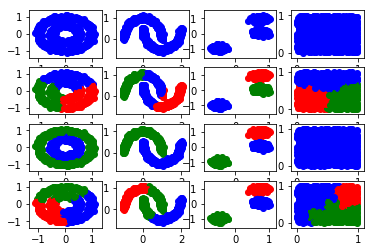

In [6]:

models=[("None",None),("Kmeans",KMeans(n_clusters=3)),
        ("DBSCAN",DBSCAN(min_samples=3,eps=0.2)),
        ("Agglomerative",AgglomerativeClustering(n_clusters=3,linkage="ward"))]
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        X,Y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(X))]
        else:
            clt_entity.fit(X)
            clt_res=clt_entity.labels_.astype(np.int)
        f.add_subplot(len(models),len(data),inx*len(data)+i+1)
#         plt.title(clt_name)
        try:
            print(clt_name,i,silhouette_score(X,clt_res))
        except:
            pass
        [plt.scatter(X[p,0],X[p,1],color=colors[clt_res[p]]) for p in range(len(X))]
plt.show()